# Laboratorio 7

### Juan Lorthiois
### Roberto Castillo

Empezamos por instalar e importar las librerias requeridas y los datos. Al igual que el ejemplo visto en clase, será necesario reiniciar el runtime depues de la instalacion.

In [2]:
!pip install -U ipykernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 138 kB 7.9 MB/s 
     |████████████████████████████████| 423 kB 71.3 MB/s 
     |████████████████████████████████| 793 kB 93.8 MB/s 
     |████████████████████████████████| 1.6 MB 51.6 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: ipython
    Found existing installation: ipython 7.9.0
    Uninstalling ipython-7.9.0:
      Successfully uninstalled ipython-7.9.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.3.4
    Uninstalling ipykernel-5.3.4:
      Successfully uninstalled ipykernel-5.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 

Ahora que ya se instao la libreria anterior y se reinicio el runtime, procedemos con la instalación de las demás librerias.

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 7.6 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.2 requires setuptools<60, but you have setuptools 65.4.1 which is incompatible.
google-colab 1.0.0 requires ipykernel~=5.3.4, but you have ipykernel 6.16.0 which is i

Finalmente, se importan las librerias necesarias.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split

Ahora importamos los datos del archivo "diabetes.csv"

In [4]:
datos = pd.read_csv("diabetes.csv")

Listo! Ahora podemos empezar con un EDA basico para ver de que se trata la BD:

### EDA basico

In [5]:
datos.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
datos.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
datos.shape

(768, 9)

In [9]:
datos.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Buenas noticias! El dataset no viene con datos faltantes, se trata de una tabla de 768 filas por 9 columnas. Y al parecer, solo consiste de datos numericos. Para estar 100% seguros continuamos describiendo los datos.

In [10]:
datos.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Al parecer la mayoría de los pacientes han tenido al menos 1 embarazo, y los datos son en gran mayoría numeros enteros, a excepcion de e BMI y la funcion de pedigree de diabetes. Esta funcion, segun se investigó mediante una breve googleada nos indica que tan probable es que un paciente desarrolle diabetes basandose en el historial de la familia. Como sabemos, el hecho de tener familiares directos con diabetes incrementa las posibilidades de que un hijo o hija también desarrolle esta enfermedad. De hecho, todas las variables presnetadas en este dataset se relacionan mucho con el desarrollo de diabetes, por lo que vamos a hacer un pairplot para ver cuales de estas variables se relacionana mas entre ellas y con la variable objetivo "Outcome".

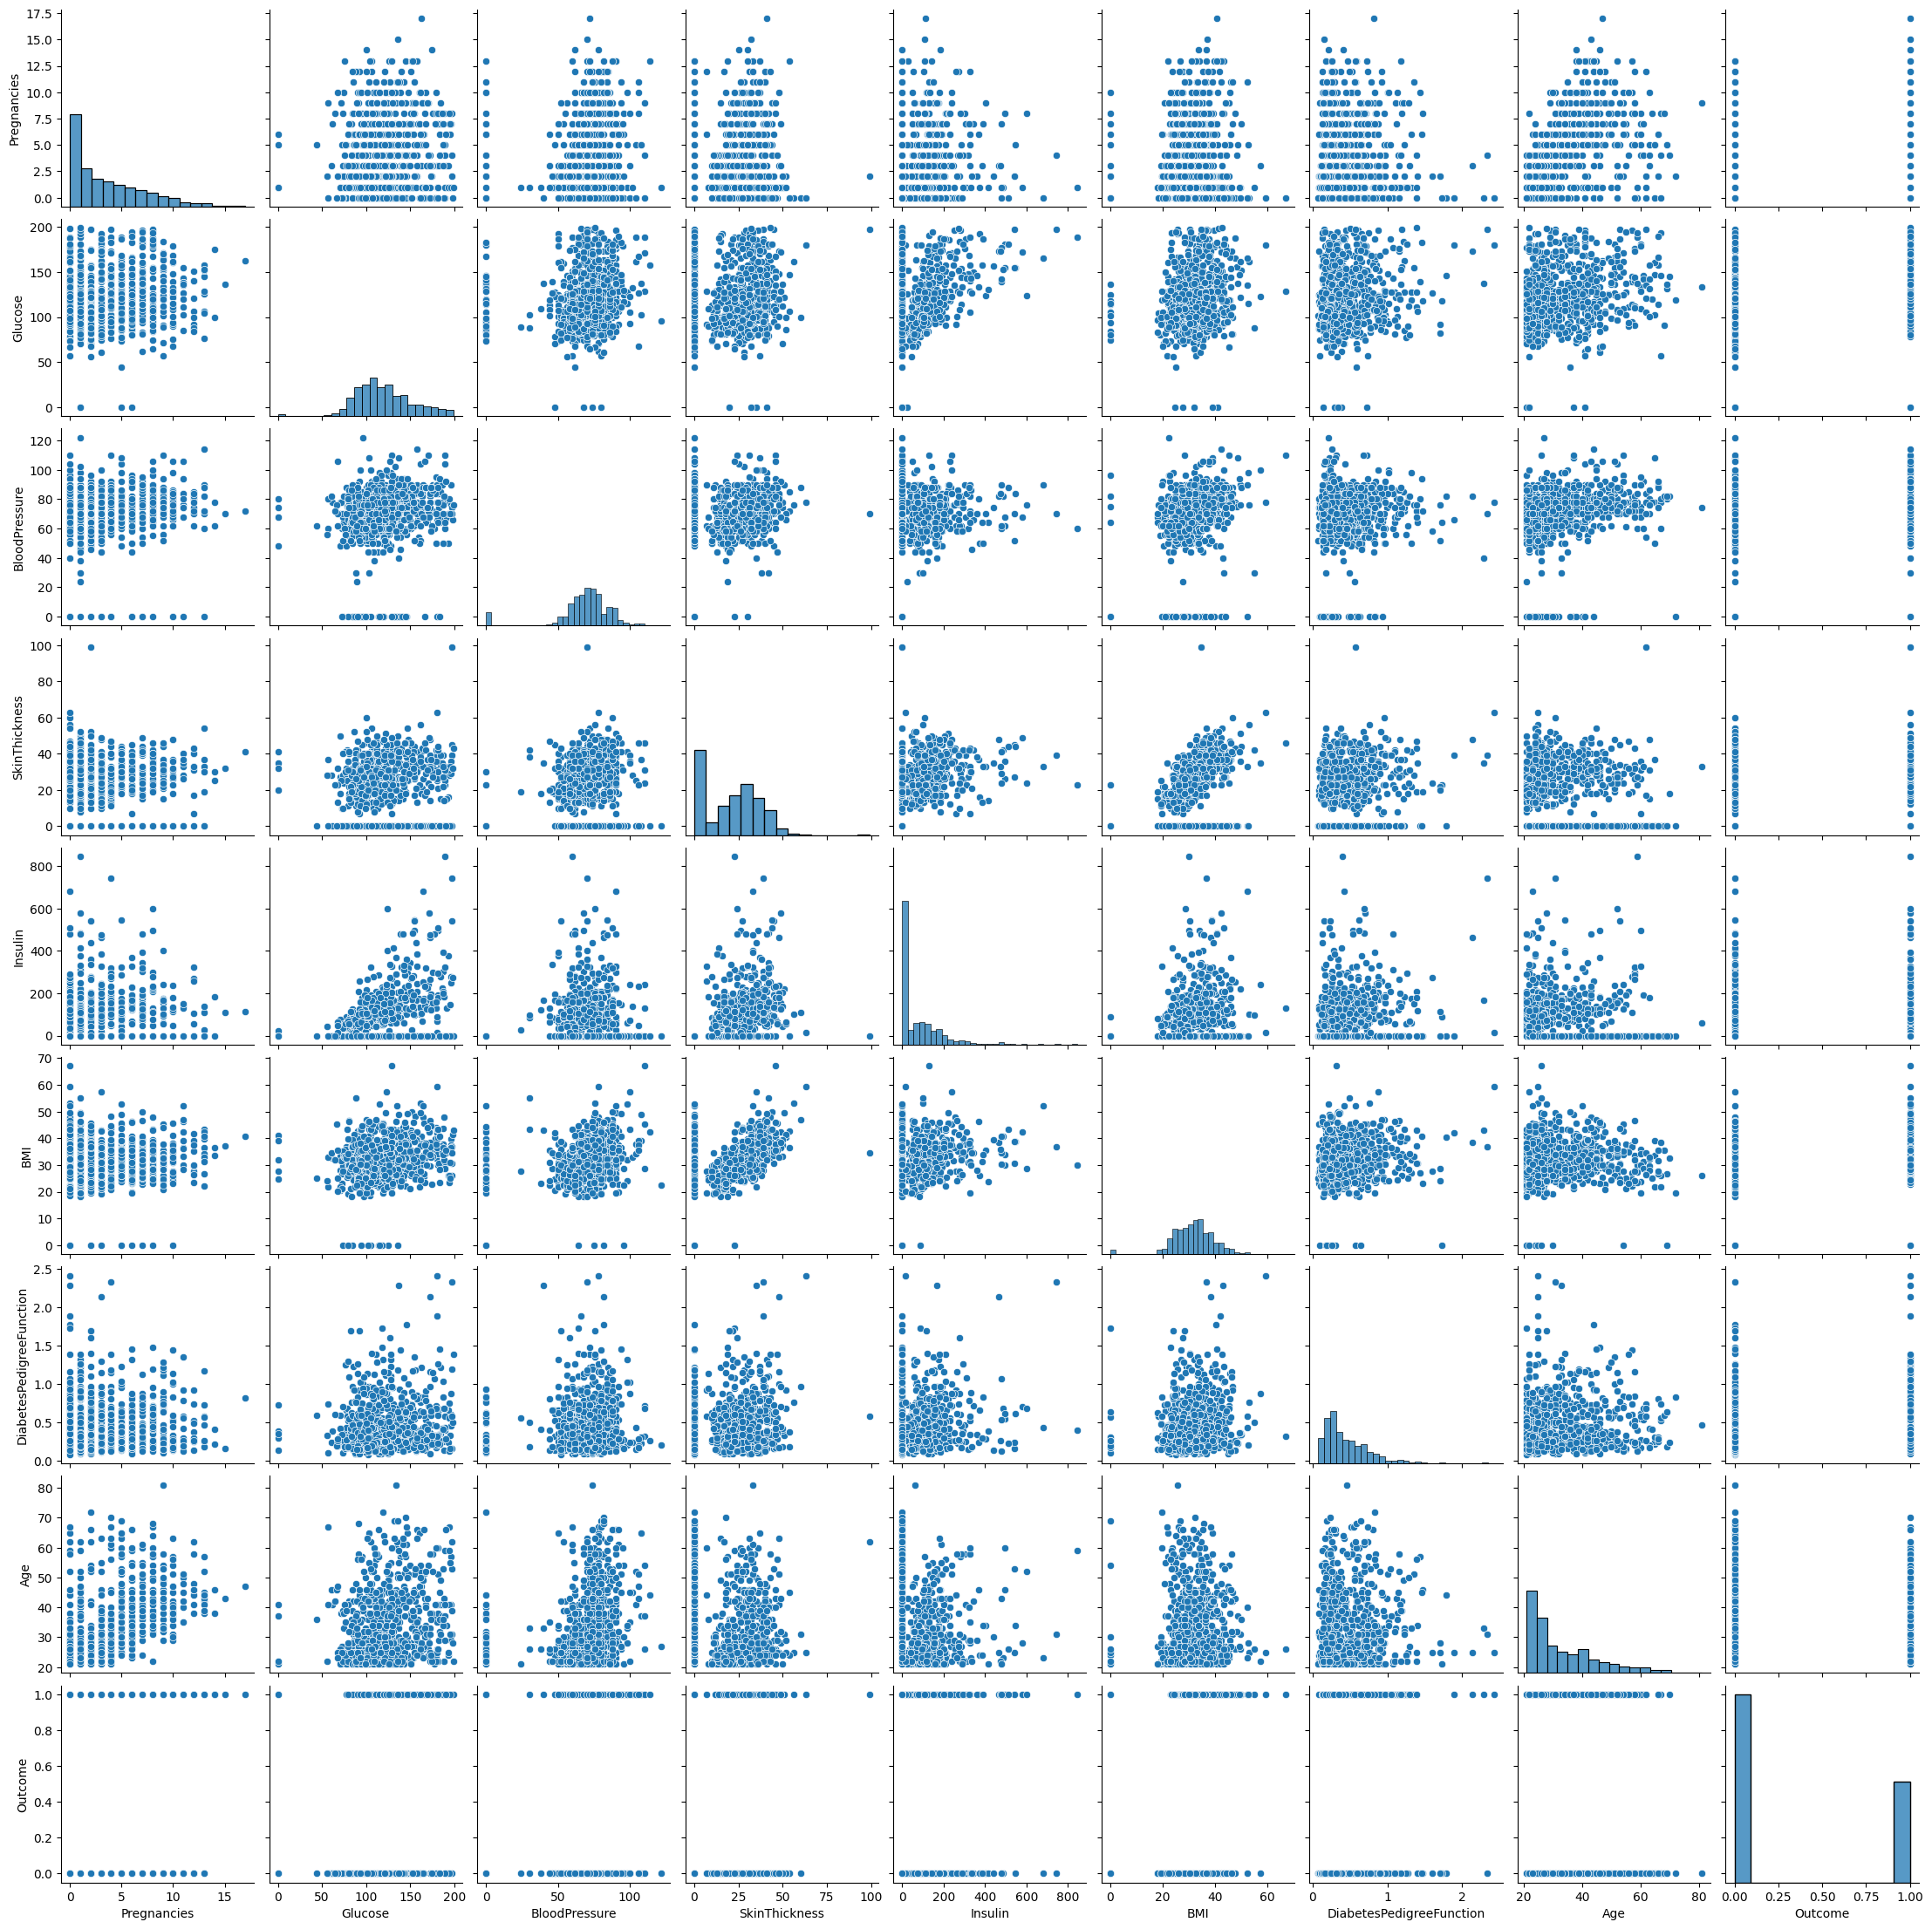

In [12]:
sns.pairplot(datos)

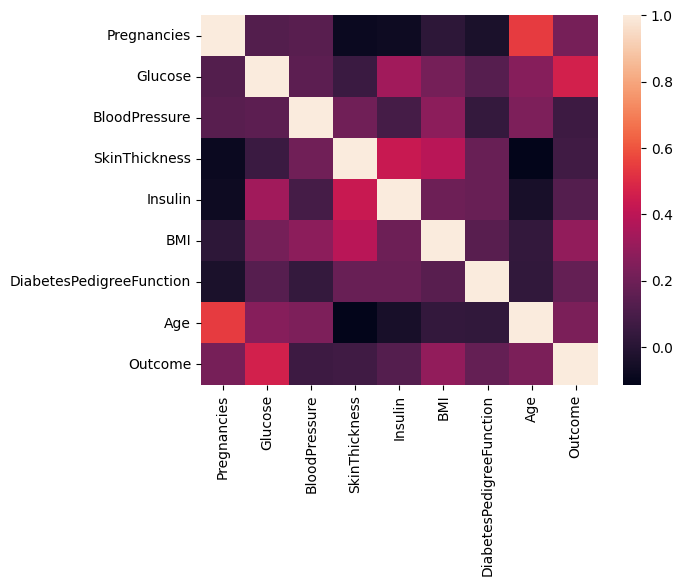

In [14]:
sns.heatmap(datos.corr())

La gráficas anteriores, son a la vez reveladoras y consistentes con lo esperado: 

1. La insulina y la glucosa tienen una correlación positiva
2. El espesor de la piel y el BMI tienen correlacion positiva.
3. Finalmente la insulina y el BMI tambien tienen correlación positiva.
4. Hay un fuerte correlacion entre la edad de las pacientes y el No. de embarazos. (lógico)

Esto es consistente con la realidad: en efecto no es un secreto que en muchos casos, las personas con sobrepeso están expuestas a un riesgo mayor cuanto se trata de contraer diabetes tipo 2 por ejemplo.

### Conclusion EDA:

Con esto damos por terminado este breve analisis exploratorio, y resumimos los principales hallazgos:

1. El dataframe consiste de 9 variables, de las cuales el "outcome" es la variable objetivo.
2. Hay un total de 768 filas
3. No hay datos faltantes y todos vienen en formato numerico float 64 o int 64.
4. Hay una fuerte correlacion entre:

      - La insulina y el BMI
      - La insulina y la glucosa
      - El espesor de la piel y el BMI

5. La mayoría de pacientes ha tenido al menos un embarazo con anterioridad. 

### Autogluon

Ahora podemos proceder con la aplicacion de Autogluon para encontrar el mejor modelo para nuestro dataset. Empezamos por separar los datos en los datasets de entreno y prueba:

In [21]:
X_train, X_test = train_test_split(datos, test_size=0.2, random_state=0)

Ahora aplicamos autogluon a los datos indicandole que la variable objetivo es "outcome" y utilizanod el parametro "best_quality" como lo pide el enucniado:

In [27]:
predictor = TabularPredictor(label="Outcome",eval_metric = 'accuracy').fit(train_data = X_train, time_limit = 600, presets = "best_quality")

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20221004_170033/"
INFO:autogluon.tabular.predictor.predictor:Presets specified: ['best_quality']
INFO:autogluon.tabular.predictor.predictor:Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=6, num_bag_sets=20
INFO:autogluon.tabular.learner.default_learner:Beginning AutoGluon training ... Time limit = 600s
INFO:autogluon.tabular.learner.default_learner:AutoGluon will save models to "AutogluonModels/ag-20221004_170033/"
INFO:autogluon.tabular.learner.default_learner:AutoGluon Version:  0.5.2
INFO:autogluon.tabular.learner.default_learner:Python Version:     3.7.14
INFO:autogluon.tabular.learner.default_learner:Operating System:   Linux
INFO:autogluon.tabular.learner.default_learner:Train Data Rows:    614
INFO:autogluon.tabular.learner.default_learner:Train Data Columns: 8
INFO:autogluon.tabular.learner.default_learner:Label Column: Outcome
INFO:autogluon.tabular.l

Listo! Ahora procedemos a obtener informacion sobre el modelo que mejor ajuste ofrece:

### Evaluacion de los modelos encontrados:

Empezamos obteniendo el summary y luego, la tabla en formato "leaderboard" que nos indic los modelos con los que se obtuvieron mejores resultados.

In [28]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.786645       1.298313  292.528439                0.001842           0.489779            2       True         14
1    NeuralNetFastAI_BAG_L1   0.776873       0.528706   83.076364                0.528706          83.076364            1       True         10
2           CatBoost_BAG_L1   0.773616       0.160344   55.433743                0.160344          55.433743            1       True          7
3         LightGBMXT_BAG_L1   0.765472       0.120511   52.678789                0.120511          52.678789            1       True          3
4            XGBoost_BAG_L1   0.765472       0.263504   40.134070                0.263504          40.134070            1       True         11
5           LightGBM_BAG_L1   0.763844       0.110333   54.697990         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.7003257328990228,
  'KNeighborsDist_BAG_L1': 0.6970684039087948,
  'LightGBMXT_BAG_L1': 0.7654723127035831,
  'LightGBM_BAG_L1': 0.7638436482084691,
  'R

In [29]:
predictor.leaderboard()

                      model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.786645       1.298313  292.528439                0.001842           0.489779            2       True         14
1    NeuralNetFastAI_BAG_L1   0.776873       0.528706   83.076364                0.528706          83.076364            1       True         10
2           CatBoost_BAG_L1   0.773616       0.160344   55.433743                0.160344          55.433743            1       True          7
3         LightGBMXT_BAG_L1   0.765472       0.120511   52.678789                0.120511          52.678789            1       True          3
4            XGBoost_BAG_L1   0.765472       0.263504   40.134070                0.263504          40.134070            1       True         11
5           LightGBM_BAG_L1   0.763844       0.110333   54.697990                0.110333          54.697990            1       True    

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.786645,1.298313,292.528439,0.001842,0.489779,2,True,14
1,NeuralNetFastAI_BAG_L1,0.776873,0.528706,83.076364,0.528706,83.076364,1,True,10
2,CatBoost_BAG_L1,0.773616,0.160344,55.433743,0.160344,55.433743,1,True,7
3,LightGBMXT_BAG_L1,0.765472,0.120511,52.678789,0.120511,52.678789,1,True,3
4,XGBoost_BAG_L1,0.765472,0.263504,40.134070,0.263504,40.134070,1,True,11
5,LightGBM_BAG_L1,0.763844,0.110333,54.697990,0.110333,54.697990,1,True,4
6,LightGBMLarge_BAG_L1,0.760586,0.138288,60.113618,0.138288,60.113618,1,True,13
7,NeuralNetTorch_BAG_L1,0.758958,0.475245,91.330929,0.475245,91.330929,1,True,12
8,RandomForestEntr_BAG_L1,0.755700,0.081138,0.686535,0.081138,0.686535,1,True,6
9,RandomForestGini_BAG_L1,0.749186,0.082069,0.637212,0.082069,0.637212,1,True,5


Como podemos ver en el leaderboard anterior, el modelo que mejores resultados obtuvo bajo la metrica "accuracy" fue el WeightedEnsemble_L2 con un score de 0.78. Esto despues de 10 minutos de entrenamiento.
Ahora procedemos con la amtriz de confusion y el resto de la evaluacion del modelo entrenado.